## The Loss Function

he loss function measures the disparity between the the target's true value and the value the model predicts.

Different problems call for different loss functions. We have been looking at regression problems, where the task is to predict some numerical value -- calories in 80 Cereals, rating in Red Wine Quality. Other regression tasks might be predicting the price of a house or the fuel efficiency of a car.

A common loss function for regression problems is the mean absolute error or MAE. For each prediction y_pred, MAE measures the disparity from the true target y_true by an absolute difference abs(y_true - y_pred).

The total MAE loss on a dataset is the mean of all these absolute differences.


## The Optimizer - Stochastic Gradient Descent

We've described the problem we want the network to solve, but now we need to say how to solve it. This is the job of the optimizer. The optimizer is an algorithm that adjusts the weights to minimize the loss.

Virtually all of the optimization algorithms used in deep learning belong to a family called stochastic gradient descent. They are iterative algorithms that train a network in steps. One step of training goes like this:

- Sample some training data and run it through the network to make predictions.
- Measure the loss between the predictions and the true values.
- Finally, adjust the weights in a direction that makes the loss smaller.


Each iteration's sample of training data is called a minibatch (or often just "batch"), while a complete round of the training data is called an epoch. The number of epochs you train for is how many times the network will see each training example.


## Learning Rate and Batch Size

Notice that the line only makes a small shift in the direction of each batch (instead of moving all the way). The size of these shifts is determined by the learning rate. A smaller learning rate means the network needs to see more minibatches before its weights converge to their best values.

The learning rate and the size of the minibatches are the two parameters that have the largest effect on how the SGD training proceeds. Their interaction is often subtle and the right choice for these parameters isn't always obvious. (We'll explore these effects in the exercise.)

Fortunately, for most work it won't be necessary to do an extensive hyperparameter search to get satisfactory results. Adam is an SGD algorithm that has an adaptive learning rate that makes it suitable for most problems without any parameter tuning (it is "self tuning", in a sense). Adam is a great general-purpose optimizer.

In [1]:
import pandas as pd
from IPython.display import display

red_wine = pd.read_csv('input/red-wine.csv')

# Create training and validation splits
df_train = red_wine.sample(frac=0.7, random_state=0)
df_valid = red_wine.drop(df_train.index)
display(df_train.head(4))

# Scale to [0, 1]
max_ = df_train.max(axis=0)
min_ = df_train.min(axis=0)
df_train = (df_train - min_) / (max_ - min_)
df_valid = (df_valid - min_) / (max_ - min_)

# Split features and target
X_train = df_train.drop('quality', axis=1)
X_valid = df_valid.drop('quality', axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1109,10.8,0.470,0.43,2.10,0.171,27.0,66.0,0.99820,3.17,0.76,10.8,6
1032,8.1,0.820,0.00,4.10,0.095,5.0,14.0,0.99854,3.36,0.53,9.6,5
1002,9.1,0.290,0.33,2.05,0.063,13.0,27.0,0.99516,3.26,0.84,11.7,7
487,10.2,0.645,0.36,1.80,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,6


In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=[11]),
    layers.Dense(512, activation='relu'),
    layers.Dense(512, activation='relu'),
    layers.Dense(1),
])

In [3]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [5]:
# Now we're ready to start the training! We've told Keras to feed the optimizer 256 rows of the training data at a time (the batch_size) 
# and to do that 10 times all the way through the dataset (the epochs).

history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=256,
    epochs=10,
)

Epoch 1/10
5/5 [==============================] - 0s 12ms/step - loss: 0.1012 - val_loss: 0.0996
Epoch 2/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0993 - val_loss: 0.1077
Epoch 3/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0997 - val_loss: 0.1004
Epoch 4/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0993 - val_loss: 0.1034
Epoch 5/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0982 - val_loss: 0.1006
Epoch 6/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0972 - val_loss: 0.0975
Epoch 7/10
5/5 [==============================] - 0s 10ms/step - loss: 0.0957 - val_loss: 0.0968
Epoch 8/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0958 - val_loss: 0.0974
Epoch 9/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0945 - val_loss: 0.1055
Epoch 10/10
5/5 [==============================] - 0s 7ms/step - loss: 0.0938 - val_loss: 0.0957


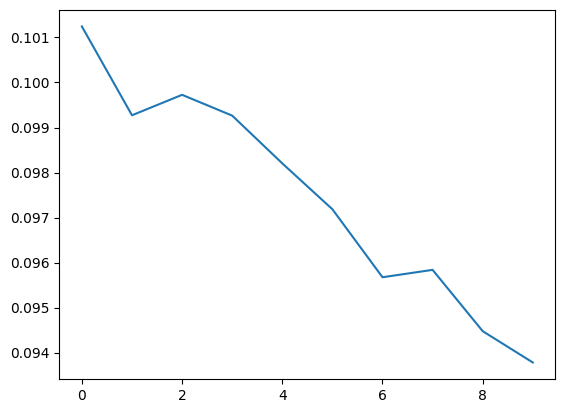

In [6]:
import pandas as pd

# convert the training history to a dataframe
history_df = pd.DataFrame(history.history)
# use Pandas native plot method
history_df['loss'].plot();